# Hypothesis testing (p-value vs. effect size)

Ready for Assignment "Show how two studies can have same effect size, but different conclusions based on the size of their samples
Show how the statistical power changes given larger effect sizes 
"

In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb

sb.set_context('notebook', font_scale=1.25)

### A Quick Re-cap

What we have learnt from the labs and lessons so far is that scientific results must be presented with a level of uncertainty i.e. a confidence interval. 

> "56% of likely voters prefer candidate A with a **margin of 4 points**." 

we also learnt that the uncertainty from sampling erros errors can be reduced by repeating the experiment. 

For reporting uncertainty, we used hypothesis testing to compare experimental results with the null hypothesis that the results don't exist. This is done because we know that due to random errors, we might see a positive experimental result, *even if no true effect exists*.  Following this thought, The p-value is at the heart of a massive controversy occuring in science currently, to the point where some journals are banning hypothesis testing completely. 

In this lab, we shall try to see this phenomenon in action. You would be required to use your existing statistical analysis and plotting abilities to visualise the effect of sample size and effect size on p-value calculation.


### Example Scenario

Suppose you are running clinical tests for a new pharmaceutical drug. In such a situation, you would create a control (placebo) group and a treatment group for running independant t-test. 

Now imagine that your results show the drug has some effect - it lowers the blood pressure for participants in the treatment group. To address uncertainty, you could ask a question like:

>"What is the probability I would see this effect due to random fluctuations if there was actually no effect?" 

Clearly, the Null hypothesis would look like: μc=μt. We can also create one-sided alternative hypothesis accordingly. 

The analysis of this question leads to p-value calculation, the probability you would see an equal or greater effect under the null hypothesis. We know that when p-value is below some critical value, typically p<0.05, then the result is declared statistically significant and the null hypothesis is rejected.

Perform following three steps to generate and visualize samples for calculating our t-statistic

1. Use `np.random.randn()` to generate 10 sample from a standard normal distribution (standard normal distribution has a mean 0 and sd of 1). Repeat this twice to simulate control and treatment group. 

2. Scale up the samples to make them positive (with mean=0 and sd=1, there are bound to be negative values, set mean to 2 instead)

3. plot histograms for both samples. 

In [83]:
np.random.seed(82)
a = np.random.randn(10) + 2 # +2 for shifting mean 
b = np.random.randn(10) + 2

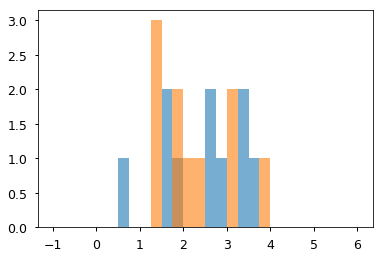

In [84]:
plt.hist(a, range=(-1, 6), bins=28, alpha=0.6);
plt.hist(b, range=(-1, 6), bins=28, alpha=0.6);

Let's start with a t-test the t-test, calculate a test statistic, t and compare t with what we would get from the null hypothesis and calculate a p-value.

First, let's see what t statistics we should see under the null hypothesis. To do this lets first generate some sample: 

### Welch's t-Test

The student t-test, we saw earlier assumes the data is normally distributed with samples having equal variance and sample size. There is a more general test that can be used when these assumptions don't hold strong, **Welch's t-test**. 

Here is how you calculate it:
![](http://www.statisticshowto.com/wp-content/uploads/2015/03/Welchs-test-for-unequal-variances.png)

where Xi, s2i, and Ni are the sample mean, sample variance, and sample size, respectively, for sample i.

Welch’s Test for Unequal Variances (also called Welch’s t-test, Welch’s adjusted T or unequal variances t-test) is a modification of a Student’s t-test to see if two sample means are significantly different. The modification is to the **degrees of freedom** used in the test, which tends to increase the test power for samples with unequal variance. When two groups have equal sample sizes and variances, Welch’s tends to give the same result as Student’s t. However, when sample sizes and variances are unequal, Student’s t-test is quite unreliable; Welch’s tends perform better.

Let's write a function for calculatying Welch's t-statistic using two samples generated above:

In [85]:
def welch_t(a, b):
    
    """ Calculate the t statistic for two samples. """
    diff = a.mean() - b.mean()
    
    # “ddof = Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, 
    #  where N represents the number of elements. By default ddof is zero.
    
    var = np.sqrt(a.var(ddof=1)/a.size + b.var(ddof=1)/b.size)
    
    return diff/var

welch_t(a,b)

0.41037468596041143

We also need to calculate the effective degrees of freedom using the formula:

![](https://1.bp.blogspot.com/-rawdGLOVCxo/Wp5ju1ei5AI/AAAAAAAABDs/GzCg-sDvrWoZwObatBKoK8-d8QsjNYISACLcBGAs/s1600/Welch-degree%2Bof%2Bfreedom.JPG)

where vi is the degrees of freedom from the first sample and is given by the formula
vi = Ni - 1 for each sample i 

Let's write a second function to calculate degree of freedom for above samples:

In [86]:
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    
    s_a = a.var(ddof=1) 
    s_b = b.var(ddof=1)
    n_a = a.size
    n_b = b.size
    
    numerator = (s_a/n_a + s_b/n_b)**2
    denominator = (s_a/ n_a)**2/(n_a - 1) + (s_b/ n_b)**2/(n_b - 1)
    
    return numerator/denominator

welch_df(a, b)

17.86731104513857

This result is for two samples (a,b) drawn from the same distribution. We are interested in distribution of t calculated from many samples from same distribution. **This will give us a distribution for comparison with t calculated from real data.**

#### T-distribution with Increasing number of trials

Let's plot the distribution of t for increasing number of simulations to give us a sense of what would happen if we could do this infinite times. Expected plot may look something similar to the one shown below:

![](sampleplot.png)


#### STEPS:
1. Use the sample size N = 10, mu = 2 and sigma= 1.5
2. Cretae a figure with i subplots (i = number of simulations)
3. for sample sizes = [10,100,1000,10000]
    
    take two samples a,b
    
    for all a_i, b_i in zip(a,b) , calculate the t using welch_t() and collect t in a numpy array
    
    draw a histogram of collected ts
    
    calculate df with welch_df()
    
    plot a PDF using df along with t histogram
    
    label the plots

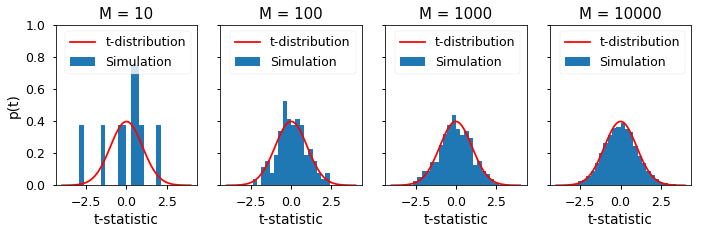

In [102]:
N = 10 # Sample size
mu, sig = 2, 1.5
fig, axes = plt.subplots(figsize=(10,3.5), ncols=4, sharey=True)
for ax, M in zip(axes, [10, 100, 1000, 10000]):
    a = np.random.randn(M, N)*sig + mu
    b = np.random.randn(M, N)*sig + mu

    ts = np.array([welch_t(a_i, b_i) for a_i, b_i in zip(a, b)])
    ax.hist(ts, range=(-4,4), bins=30, normed=True, label='Simulation')

    df = welch_df(a, b)
    x = np.linspace(-4, 4, 100)
    ax.plot(x, stats.t.pdf(x, df), color='r', label='t-distribution')

    ax.set_title("M = {}".format(M))


    ax.set_ylim(0, 1)
    ax.set_xlabel("t-statistic")
    _ = ax.legend()
    axes[0].set_ylabel("p(t)")
    
fig.tight_layout()

we see that as the number of simulations gets larger, the distribution of t-statistics becomes closer and closer to the t-distribution with degrees of freedom calculated from the data. We can use the t-distribution as an approximation of this process, as if we had actually performed the simulation infinite times. 

#### T-distribution with Increasing number of samples

Let's try to run above simulation with changing size of the sample as [2, 10, 50] and keeping M constant at 10000. 

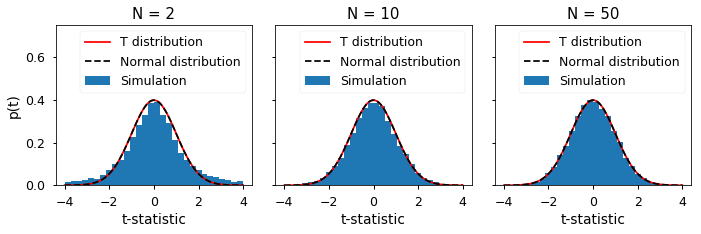

In [108]:
M = 10000 # Simulations
mu, sig = 2, 1.5
fig, axes = plt.subplots(figsize=(10,3.5), ncols=3, sharey=True)
for ax, N in zip(axes, [2, 10, 50]):
    a = np.random.randn(M, N)*sig + mu
    b = np.random.randn(M, N)*sig + mu

    ts = np.array([welch_t(a_i, b_i) for a_i, b_i in zip(a, b)])
    ax.hist(ts, range=(-4,4), bins=30, normed=True, label='Simulation')

    df = welch_df(a, b)
    x = np.linspace(-4, 4, 100)
    ax.plot(x, stats.t.pdf(x, df), 'r', label='T distribution')
    ax.plot(x, stats.norm.pdf(x), '--k', label='Normal distribution')
    ax.set_title("N = {}".format(N))

format_axes(axes)
fig.tight_layout()

We can see that with increasing sample size, the t-distribution can be approximated by a normal distribution with zero mean and a variance of one. 

So how is this used to calculate a p-value? Remember that this is the distribution of t for two samples drawn from the same distribution, that is, for the null hypothesis that μ1=μ2.

In a typical experiment, you will have samples from what you believe is two groups, the control group and the treatment group. Let's simulate some samples for control and treatment group, and calculate t, then go through how to calculate a p-value.

Text(0.5,0,'Sample value')

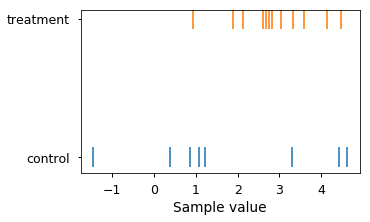

In [110]:
np.random.seed(1)
control = np.random.randn(8)*1.5 + 2
treatment = np.random.randn(12) + 3

ig, ax = plt.subplots(figsize=(5,3))
colors = sb.color_palette()
ax.scatter(control, np.zeros(len(control)), c=colors[0], 
            marker='|', s=400, linewidths=2, alpha=0.9)
ax.scatter(treatment, np.ones(len(treatment)), color=colors[1],
            marker='|', s=400, linewidths=2, alpha=0.9)
ax.set_yticks([0, 1])
ax.set_yticklabels(['control', 'treatment'])
ax.set_xlabel('Sample value')

calculate welch-t and degree of freedom from these samples using functions developed earlier:

In [111]:
t = welch_t(treatment, control)
df = welch_df(treatment, control)
t,df

(1.325675538604432, 8.95372010421334)

The p-value is the probability we would see a value equal to or more extreme than t, under the null hypothesis. We can find this probability using the t-distribution with degrees of freedom. We shall use a one tailed test which suits our question i.e. drug has a positive effect.

For a one-tailed test, then the p-value is simply equal to the area under the t-distribution **less than t**.

Let's draw a plot to identify the area under curve. Your plot may look similar to the one shown here :

![](AUC.png)

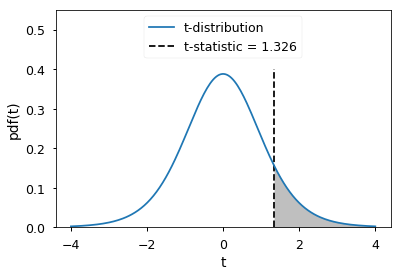

In [112]:
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 200)
t_dist = stats.t.pdf(x, df)
ax.plot(x, t_dist, label='t-distribution')
ax.vlines(t, 0, 0.4, linestyles='--', color='k', 
          label='t-statistic = {:.3f}'.format(t))
ax.set_ylabel('pdf(t)')
ax.set_xlabel('t')
ax.set_ylim(0, 0.55)
ax.legend(loc=9)
ax.fill_between(x, 0, t_dist, where=(x >= t), color='grey', alpha=0.5)

The easiest way to calculate the shaded area is with the cumulative density function (CDF). 

>The CDF at t is equal to the area under the curve for all values less than t.

In [113]:
p = stats.t.cdf(t, df)
p

0.891113799943723

In this case, there is a 89% probability we would see t equal to or greater than what we saw from our data. We would not be able to reject the null hypothesis since p is not less than 0.05. 

Building on above code, we can also write a function that calculates the p-value for given samples with a two-sided test by taking advantage of the symmetry of the t-distribution to calculate only one side:

In [116]:
def p_value(a, b):

    "Calculate two-sided t-test for two samples a and b."

    t = welch_t(b, a)
    df = welch_df(b, a)
    
    p = stats.t.cdf(-np.abs(t), df)

    return t, 2*p

In [117]:
p_value(control, treatment)

(1.325675538604432, 0.21777240011255405)

Let's now explore how the p-value depends on various things like sample size and effect size. We will take the effect size as the difference in means between two samples from normal distributions with variances of one. 

Let's write a function to run a simulation with N (sample size), effect size (difference in means) and return the p_value. 

In [119]:
def simulate_experiment(N, effect=1):
    
    control = np.random.randn(N)
    treatment = np.random.randn(N) + effect
    
    t, p = p_value(control, treatment)

    return p

Using the given values of M and N below, run the above function for effect sizes [0.2, 0.5, 1]. Store the values in an array using formula 

`ps = np.array([sum(simulate_experiment(N, effect_size) for m in range(M))/M for N in Ns])`

In [120]:
Ns = np.linspace(2,300).astype(int) # Sample sizes
M = 1000 # Simulations

for e_size in [0.2,0.5,1]:
    
ps1 = np.array([sum(simulate_experiment(N, 0.2) for m in range(M))/M for N in Ns])
ps2 = np.array([sum(simulate_experiment(N, 0.5) for m in range(M))/M for N in Ns])
ps3 = np.array([sum(simulate_experiment(N, 1) for m in range(M))/M for N in Ns])

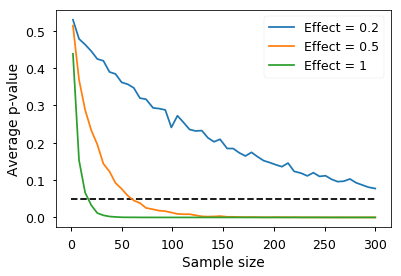

In [121]:
plt.plot(Ns, ps1, label="Effect = 0.2")
plt.plot(Ns, ps2, label="Effect = 0.5")
plt.plot(Ns, ps3, label="Effect = 1")
plt.hlines(0.05, 0, 300, linestyles='--', color='k')
plt.ylabel("Average p-value")
plt.xlabel("Sample size")
plt.legend()


What we see here is that the p-value is a function of the sample size. This means that regardless of effect size, if you have a large amount of data, you will get a significant p-value. It also means that if you don't have a significant p-value, an effect isn't rejected, you just can't see it through the noise.